In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [130]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/hierarchical/data-preprocess.csv')
X = pd.read_csv('data/hierarchical/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [131]:
X_train = pd.read_csv('data/hierarchical/data-train.csv')
X_test = pd.read_csv('data/hierarchical/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [132]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [133]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

In [134]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in predictions]

Epoch 1/10


83/83 [==============================] - 2s 7ms/step - loss: -0.3344 - accuracy: 0.2084 - val_loss: -1.4312 - val_accuracy: 0.2266
Epoch 2/10
83/83 [==============================] - 0s 4ms/step - loss: -2.8981 - accuracy: 0.3555 - val_loss: -4.5991 - val_accuracy: 0.4698
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: -5.6176 - accuracy: 0.4565 - val_loss: -7.6512 - val_accuracy: 0.5453
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: -8.8436 - accuracy: 0.5034 - val_loss: -10.4546 - val_accuracy: 0.4879
Epoch 5/10
83/83 [==============================] - 0s 4ms/step - loss: -11.6800 - accuracy: 0.5155 - val_loss: -13.0072 - val_accuracy: 0.5332
Epoch 6/10
83/83 [==============================] - 0s 4ms/step - loss: -14.1493 - accuracy: 0.5234 - val_loss: -15.3591 - val_accuracy: 0.5453
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: -16.4167 - accuracy: 0.5280 - val_loss: -17.5900 - val_accuracy: 0.5453
Epoch 8/10

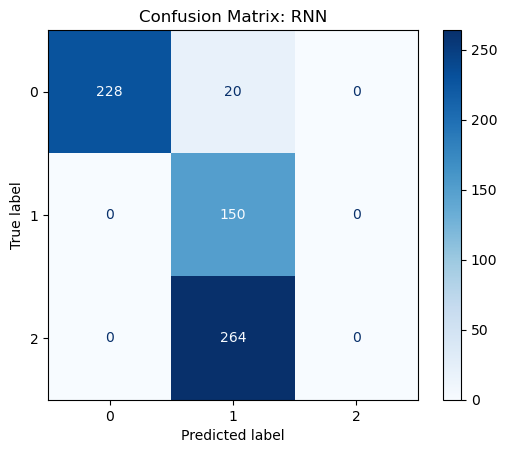

In [135]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       248
           1       0.35      1.00      0.51       150
           2       0.00      0.00      0.00       264

    accuracy                           0.57       662
   macro avg       0.45      0.64      0.49       662
weighted avg       0.45      0.57      0.48       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
